<a href="https://colab.research.google.com/github/Vakhranev/Networks/blob/master/HW_3_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Network Science</center>

Home Assignment #3: Epidemic Models

#### <hr /> General Information

**Due Date:** 11.06.2020 21:00 <br>
**Late submission policy:** -1 points per day <br>


Please send your reports to <iakarpov@hse.ru> with message subject of the following structure: <br>
**[HSE SNA Magolego 2020] *{LastName}* *{First Name}* HW_3*

Support your computations with figures and comments. <br>
If you are using IPython Notebook you may use this file as a starting point of your report.

## Problems

### Task 1. Epidemic modelling

Use any existing network from our [classes](https://dl.dropboxusercontent.com/s/8eo1sjfhu5spb0f/vk.tsv?dl=1)  or your couse project

1.1. Using Seminar examples or [ndlib](https://ndlib.readthedocs.io/en/latest/reference/reference.html) implement one of the possible models (SI, SIS, SIR, SEIR, SEIS, SWIR, Threshold, Generalised Threshold, Kertesz Threshold, Independent Cascades) to model epidemics in given network<br>


In [0]:
# Start your code here
#
#
#
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
from numpy.linalg import eig
from scipy.integrate import odeint
%matplotlib inline

In [7]:
G = nx.read_adjlist('fb.adjlist')
n = len(G.nodes())
n

494

In [0]:
A = np.array(nx.adjacency_matrix(G).todense())
beta, gamma = 0.03, 0.2
t = np.arange(0,5,0.05)
idx = np.random.choice(range(n), 5)
i0 = np.zeros((n,))
i0[idx] = 1
z0 = np.concatenate((1-i0,i0))
def sis(z, t, A, n, beta, gamma):
    return np.concatenate((
        -beta * z[0:n] * A.dot(z[n:2*n]) + gamma * z[n:2*n],
         beta * z[0:n] * A.dot(z[n:2*n]) - gamma * z[n:2*n]))
z = odeint(sis, z0, t, (A, n, beta, gamma))

In [9]:
z.shape

(100, 988)

Text(0.5, 1.0, 'Probability for all nodes')

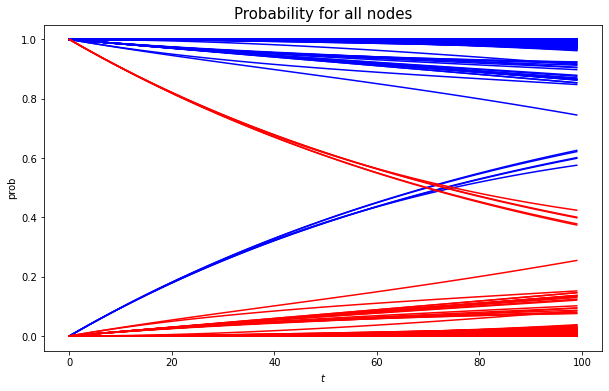

In [10]:
nId = 6
s = z[:,0:n]
x = z[:,n:2*n]
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(s,color = 'blue')
ax.plot(x,color = 'red')
ax.set_xlabel('$t$')
ax.set_ylabel('prob')
ax.set_title('Probability for all nodes', fontsize = 15)

### Task 2. Bonus Task
**+10 points:** Using gradient optimization fit Infection or Recovery curve to the [observed data](https://yastat.net/s3/milab/2020/covid19-stat/data/data_struct_12.json?v=1590678089)

In [0]:
# Start your code here
#
#
#